In [5]:
from google.colab import files
uploaded = files.upload()

Saving covid_worldwide.csv to covid_worldwide (1).csv


🔹 Decision Tree Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        18

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47

Confusion Matrix:
 [[29  0]
 [ 0 18]]

--------------------------------------------------

🔹 Random Forest Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        18

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47

Confusion Matrix:
 [[29  0]
 [ 0 18]]

--------------------------------------------------

🔹 KNN Accuracy: 0.9574
              precision    recall  f1-score   support

           0       0

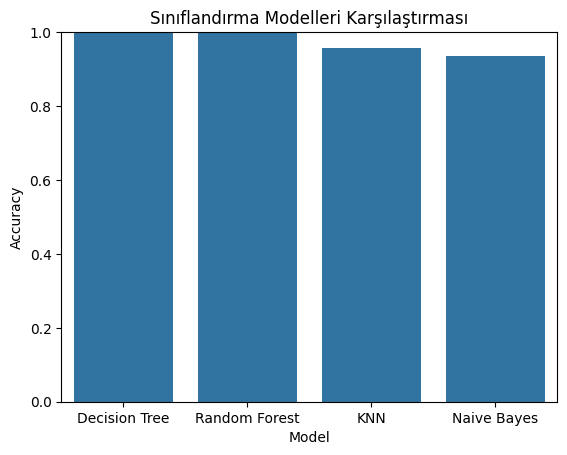

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# 1.Veri Yükleme
df = pd.read_csv("/content/covid_worldwide.csv")

# 2.Veri Temizleme
columns_to_clean = ['Total Cases', 'Total Deaths', 'Total Recovered', 'Active Cases', 'Total Test', 'Population']

for col in columns_to_clean:
    df[col] = df[col].str.replace(',', '').str.strip()
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.fillna(df.mean(numeric_only=True), inplace=True)

# Gereksiz sütunları çıkarıldı
df_clean = df.drop(['Serial Number', 'Country'], axis=1)

# 3. Hedef Değişken Oluşturuldu (yüksek ölüm oranı = 1, düşük = 0)
threshold = df_clean['Total Deaths'].median()
df_clean['High_Death_Rate'] = (df_clean['Total Deaths'] > threshold).astype(int)

# 4. Özellik ve Etiket Ayırma yapıldı
X = df_clean.drop("High_Death_Rate", axis=1)
y = df_clean["High_Death_Rate"]

# 5. Eğitim/Test Ayrımı ve Ölçekleme yapıldı
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Modeller
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    results.append((name, acc))

    print(f"🔹 {name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\n" + "-"*50 + "\n")

# 7. Sonuçları Görselleştirildi
results_df = pd.DataFrame(results, columns=["Model", "Accuracy"])

sns.barplot(data=results_df, x="Model", y="Accuracy")
plt.title("Sınıflandırma Modelleri Karşılaştırması")
plt.ylim(0, 1)
plt.show()
